In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

dateAndTime = "2018-11-19-10-54-53/";
filename = '/Users/roberto/data/RO-logging/'+dateAndTime+'sorted_eigenvectors.csv';
print('Reading from: ' + filename)
df1 = pd.read_csv(filename, names=range(1800))

#convert dataframe to matrix
eigenvecs = np.copy(df1.values)
[m,n] = shape(eigenvecs)

filename = '/Users/roberto/data/RO-logging/'+dateAndTime+'labels.csv';
print('Reading from: ' + filename)
df2 = pd.read_csv(filename, names=range(m))
labels = np.copy(df2.values)
labels = labels.T
print("Shape of eigenvecs is:\n",shape(eigenvecs))

Reading from: /Users/roberto/data/RO-logging/2018-11-19-10-54-53/sorted_eigenvectors.csv
Reading from: /Users/roberto/data/RO-logging/2018-11-19-10-54-53/labels.csv
Shape of eigenvecs is:
 (46, 1800)


In [3]:
# Handcrafted features for all data (train and test data)
max_vals = eigenvecs[:,0]
num_landmarks = count_nonzero(eigenvecs,axis=1)

q1_vals = []
q3_vals = []
for i in range(m):
    q1_index = int(round(num_landmarks[i]/4))
    q1_vals.append(eigenvecs[i,q1_index])
    q3_index = int(round(num_landmarks[i]*3/4))
    q3_vals.append(eigenvecs[i,q3_index])
#     plt.plot([0,q1_index,q3_index],[max_vals[i],q1_vals[i],q3_vals[i]])

In [4]:
temp_dict = {'max_vals':max_vals,'num_landmarks':num_landmarks,
             'q1_vals':q1_vals,'q3_vals':q3_vals}
df_features = pd.DataFrame(data = temp_dict)
df_features.head()

,max_vals,num_landmarks,q1_vals,q3_vals
0,0.032392,1800,0.028608,0.018571
1,0.033420,1762,0.029834,0.016797
2,0.036736,1706,0.032818,0.004110
3,0.039013,1514,0.033340,0.010026
4,0.043808,1386,0.034167,0.000000


In [5]:
print(num_landmarks[0])
print(np.count_nonzero(eigenvecs[0,0:1800],axis=0))

1800
1800


In [6]:
rng_state = np.random.get_state()
np.random.shuffle(eigenvecs)
np.random.set_state(rng_state)
np.random.shuffle(labels)

training_to_test_ratio = 0.6
split_index = int(training_to_test_ratio*m)
print("Split index is:\n",split_index)

X_total = np.copy(df_features.values)
y_total = np.copy(ravel(labels))

X_train = np.copy(df_features.values[0:split_index,:])
y_train = np.copy(ravel(labels[0:split_index]))
eig_train = np.copy(eigenvecs[0:split_index,:])

X_test = np.copy(df_features.values[split_index+1:m,:])
y_test = np.copy(ravel(labels[split_index+1:m]))
eig_test = np.copy(eigenvecs[split_index+1:m,:])

[m_train,n_train] = shape(X_train)
[m_test,n_test] = shape(X_test)
print("Size of training data is: \n",shape(X_train))
print("Size of test data is: \n",shape(X_test))

Split index is:
 27
Size of training data is: 
 (27, 4)
Size of test data is: 
 (18, 4)


/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


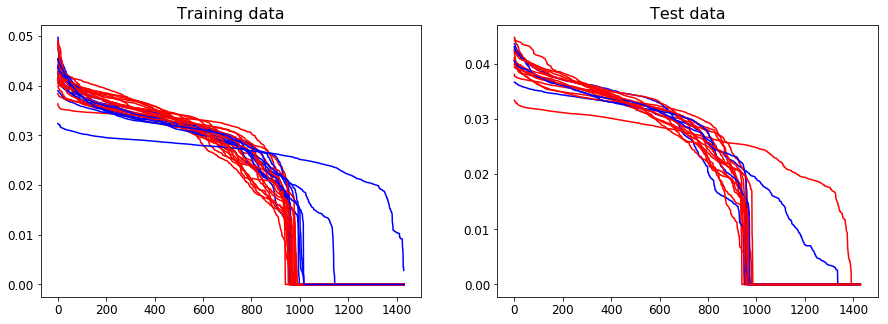

In [7]:
label_colours = []   
test_colours = []
for i in range(m_train):
    if(y_train[i] == 1):
        label_colours.append('red')
    else:
        label_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        test_colours.append('red')
    else:
        test_colours.append('blue')

plt.figure(figsize=(15,5))

for i in range(m_train):
    plt.subplot(121)
    plt.plot(eig_train[i,:].T, color=label_colours[i]);
    plt.title("Training data", fontsize=16)

for i in range(m_test):
    plt.subplot(122)
    plt.plot(eig_test[i,:].T, color=test_colours[i]);
    plt.title("Test data", fontsize=16)

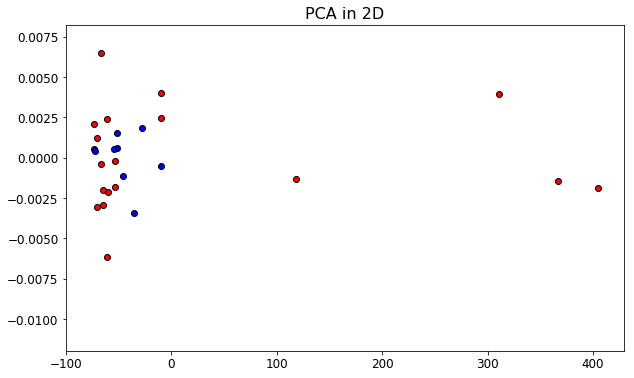

Elements considered:
 27  of  46


In [8]:
from sklearn import decomposition

X = np.copy(X_train)
y = np.copy(ravel(y_train))

[a,b] = shape(X)

fig = plt.figure(1, figsize=(10, 6))
plt.clf()

plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

for i in range(a):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=label_colours[i],
           edgecolor='k')
plt.title("PCA in 2D", fontsize=16)
plt.show()
print("Elements considered:\n",a," of ",m)

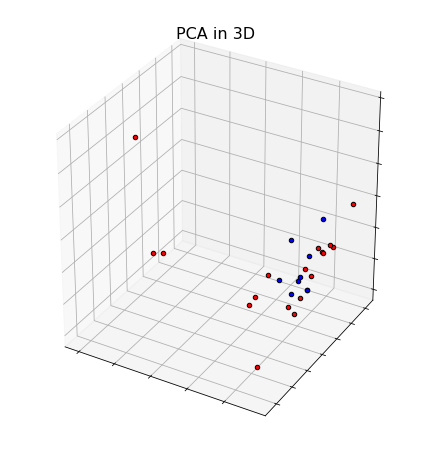

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

X = np.copy(X_train)
y = np.copy(ravel(y_train))

[a,b] = shape(X)

fig = plt.figure(1, figsize=(6, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

for i in range(a):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=label_colours[i],
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.title("PCA in 3D", fontsize=16)
plt.show()

In [18]:
from sklearn.svm import SVC

X = np.copy(X_train)
y = np.copy(ravel(y_train))

print(shape(X))
print(shape(y))

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float(50))
svm_clf.fit(X, y)

(27, 4)
(27,)


SVC(C=50.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

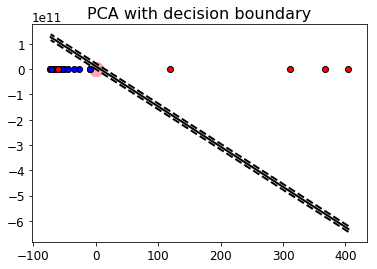

In [21]:
xlim1 = X_pca[0, 0]
xlim2 = X_pca[split_index-1, 0]

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plot_svc_decision_boundary(svm_clf, xlim1, xlim2)
for i in range(split_index):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=label_colours[i],
           edgecolor='k')
plt.title("PCA with decision boundary", fontsize=16)
plt.show()


In [12]:
print(shape(X_test))
predictions = svm_clf.predict(X_test)
print(predictions)

(18, 4)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


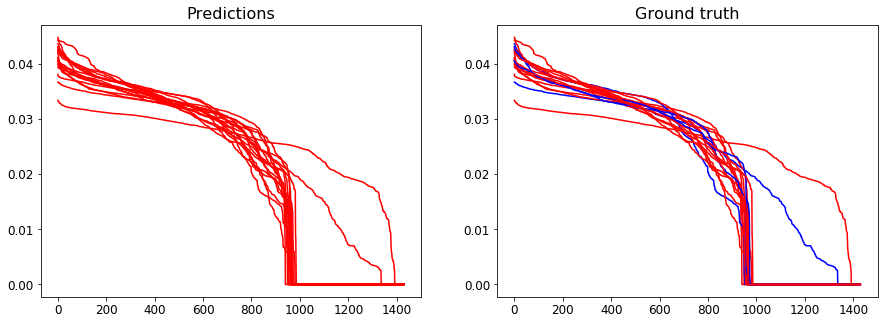

In [13]:
predict_colours = []
correct_colours = []
for i in range(m_test):
    if(predictions[i] == 1):
        predict_colours.append('red')
    else:
        predict_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        correct_colours.append('red')
    else:
        correct_colours.append('blue')

plt.figure(figsize=(15,5))
for i in range(m_test):
    plt.subplot(121)
    plt.plot(eig_test[i,:].T, color=predict_colours[i]);
    plt.title("Predictions", fontsize=16)

    plt.subplot(122)
    plt.plot(eig_test[i,:].T, color=correct_colours[i]);
    plt.title("Ground truth", fontsize=16)